<a href="https://colab.research.google.com/github/kapil0808/Stock-price-using-RNN-LSTM-/blob/master/Copy_of_LSTM_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
pip install -q keras

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
dataset_train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Google_Stock_Price_Train.csv')

In [45]:
training_set=dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [47]:
training_set_scaled.shape

(1258, 1)

In [48]:
X_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [49]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [52]:
#Initialising the RNN
regressor = Sequential()

In [55]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [56]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [57]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [58]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [59]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [60]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [61]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0448
Epoch 2/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0039
Epoch 13/100


In [63]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [64]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [66]:
X_test=[]
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

In [67]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [68]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

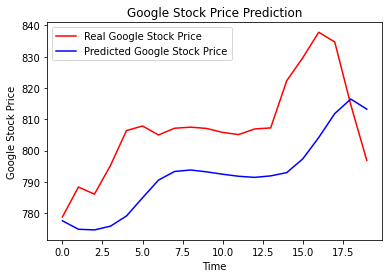

In [70]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()